<h1>Escalamiento de datos numericos

<h1>

<p> Transformaciones lineales </p>

In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]

In [ ]:
# Reglas de escalamiento
max_raw = raw.max()
min_raw = raw.min()

Xs = (2*raw - min_raw - max_raw)/ (max_raw - min_raw)

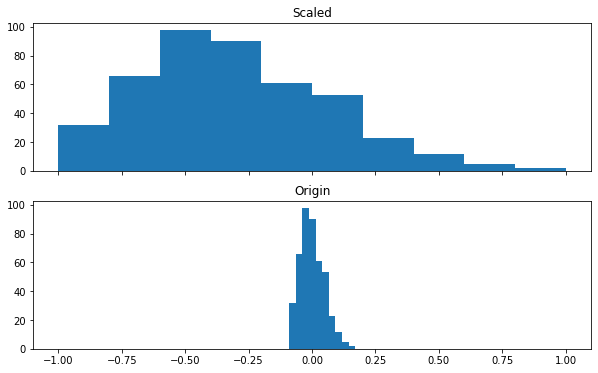

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10,6))
ax[0].hist(x=Xs)
ax[0].set_title("Scaled")
ax[1].hist(x=raw)
ax[1].set_title("Origin")

plt.show()

In [ ]:
# Modelos de entrenamiento

def train_model_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_model_scaled():
    linear_model.LinearRegression().fit(Xs,y)

In [ ]:
raw_time = timeit.timeit(train_model_raw, number=100)
scaled_time = timeit.timeit(train_model_scaled, number=100)
print('Train raw : {}'.format(raw_time))
print('Train scaled : {}'.format(scaled_time))

Train raw : 0.060466228000223055
Train scaled : 0.052178636000462575


In [ ]:
## Z-score
mean = raw.mean()
dstd = raw.std()
Zscore = (raw - mean)/dstd

Text(0.5, 1.0, 'raw')

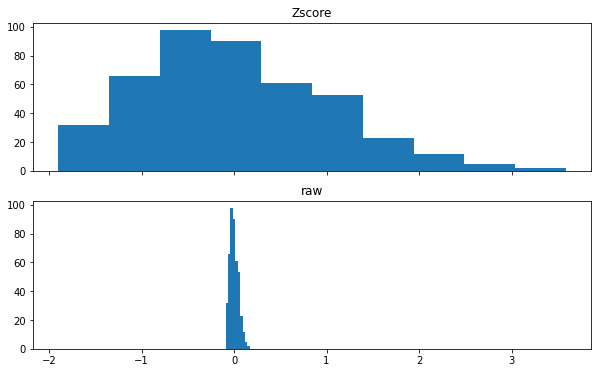

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10,6))
ax[0].hist(Zscore)
ax[0].set_title('Zscore')
ax[1].hist(raw)
ax[1].set_title('raw')

In [ ]:
def train_model_raw2():
    linear_model.LinearRegression().fit(raw,y)


def train_model_Zscore():
    linear_model.LinearRegression().fit(Zscore,y)

In [ ]:
raw_time2 = timeit.timeit(train_model_raw, number=100)
zscore_time = timeit.timeit(train_model_Zscore, number=100)
print("time raw : {}".format(raw_time2))
print("time Zscore : {}".format(zscore_time))

time raw : 0.06113424200157169
time Zscore : 0.050991307998629054


In [ ]:
# Transformaciones no lineales

df = pd.read_csv('/work/cars.csv')

<AxesSubplot:>

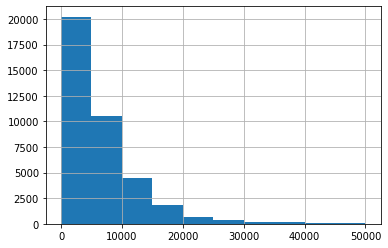

In [ ]:
df.price_usd.hist()

In [ ]:
## Tangente Hiperbolica
p=10000
Xtanh = df.price_usd.apply(lambda x : np.tanh(x/p))

Text(0.5, 1.0, 'Xtanh')

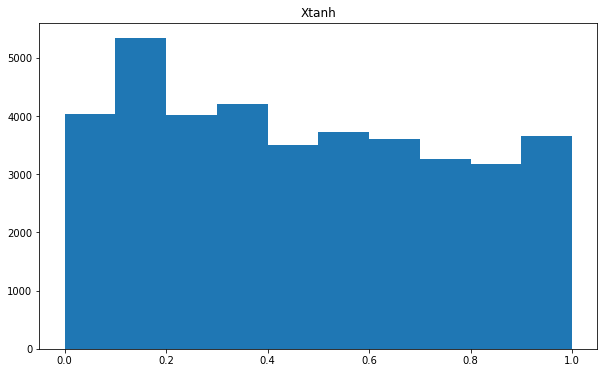

In [ ]:
fig, ax = plt.subplots(sharex= True, figsize=(10,6))
"""ax[0].hist(df.price_usd)
ax[0].set_title('Precio_usd')
"""
ax.hist(Xtanh)
ax.set_title('Xtanh')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b38c647e-97e2-40dc-b8c0-b6343a083801' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>